In [1]:
#loading of libaries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

mpl.rcParams['figure.dpi']= 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [25]:
#loading of the data into dataframes
mobility_dl = pd.read_csv("E:/Onedrive/Privat AnMath/2020_DE_Region_Mobility_Report.csv", delimiter = ',')                     
corona_dl = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv?v=2021-01-01", index_col = 'date')
weather_dl = pd.read_csv('https://userpage.fu-berlin.de/soga/300/30100_data_sets/DWD.csv', delimiter = ";", encoding='latin-1')

In [79]:
#filtering of the dataframes
mobility = mobility_dl.groupby('date').mean().drop(['sub_region_2', 'metro_area', 'census_fips_code'], axis = 1)
mobility.columns = ['Retail and Recreation-M', 'Grocery and Pharmacy-M', 'Parks-M', 
                                 'Transit Stations-M', 'Workplaces-M', 'Residential-M']

corona = corona_dl[(corona_dl.location=='Germany')].drop(['iso_code','continent', 'location','extreme_poverty',                                                   
                                                      'cardiovasc_death_rate', 'diabetes_prevalence',                                                          
                                                      'handwashing_facilities', 'hospital_beds_per_thousand',                                                     'life_expectancy', 'population',  'gdp_per_capita', 
                                                        'female_smokers', 'male_smokers', 'population_density', 'median_age',
                                                       'aged_65_older', 'aged_70_older','human_development_index', 
                                                      'stringency_index', 'weekly_icu_admissions', 'new_cases_smoothed', 
                                                         'new_deaths_smoothed',  'icu_patients_per_million',   'total_cases_per_million', 
                                                      'new_cases_per_million',
                                                       'new_cases_smoothed_per_million', 'total_deaths_per_million',
                                                       'new_deaths_per_million', 'new_deaths_smoothed_per_million', 
                                                        'hosp_patients_per_million', 'weekly_icu_admissions_per_million',
                                                       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                                                      'total_tests_per_thousand', 'new_tests_per_thousand',
                                                       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',  
                                                      'total_vaccinations_per_hundred', 'hosp_patients', 'new_tests', 
                                                          'total_vaccinations', 'tests_units','new_vaccinations_smoothed',
                                                         'new_vaccinations_smoothed_per_million', 'new_vaccinations', 'tests_per_case',
                                                          'positive_rate', 'total_tests', 'icu_patients'], axis = 1)
corona.columns = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'R']

In [80]:
corona[['Total Deaths']] = corona[['Total Deaths']][:-28]

In [81]:
#sns.lineplot(data= corona_dl[(corona_dl.location=='Germany')][['total_vaccinations']])

In [82]:
#merging of dataframes
df = pd.merge(corona, mobility, left_on = 'date', right_on ='date')
df = df.fillna(value={'Total Deaths':0, 'New Deaths':0, 'R':0})

In [2]:
df.head()

NameError: name 'df' is not defined

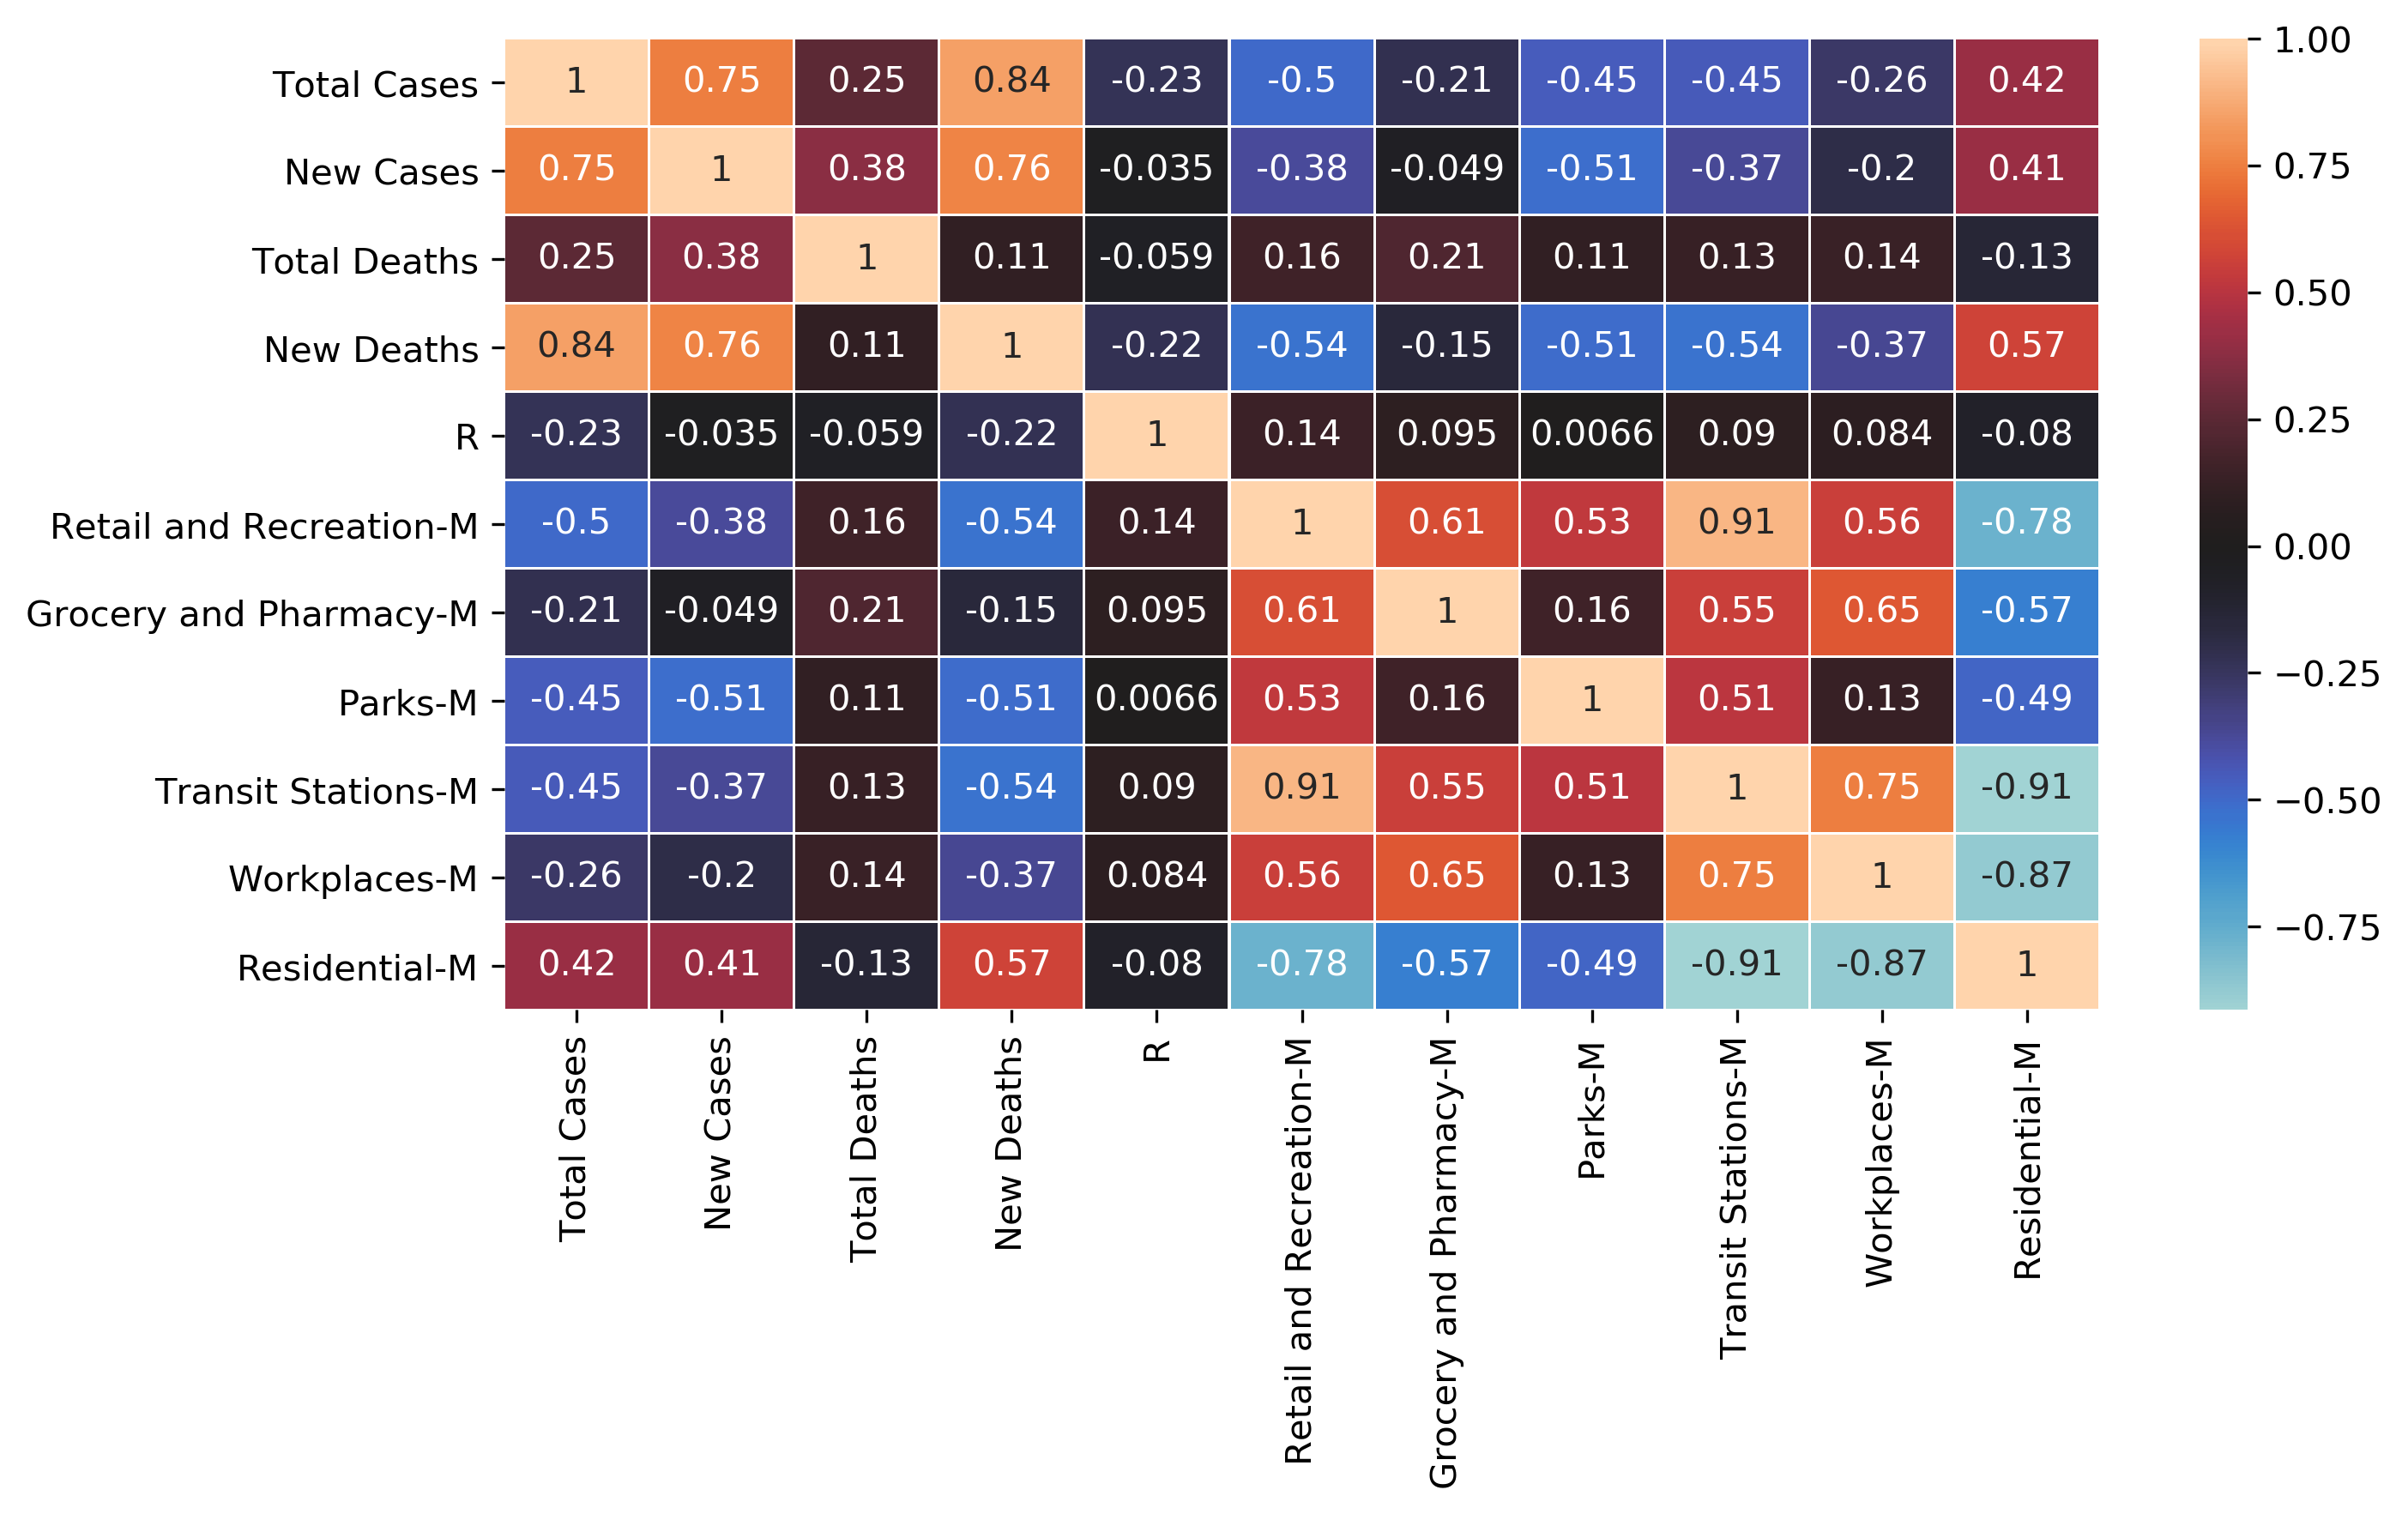

In [84]:
#corrolations of the dataframe
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, center = 0)

In [85]:
labels = np.array(df['New Cases'])
features= df.drop('New Cases', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [86]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [87]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [88]:
rf.predict([[2088000, 20398, 49783, 1013, 1, -67, -27, 17, -49, -20 , 6]])

array([21141.69])

In [75]:
#plt.figure(figsize=(6, 3))
#sns.lineplot(data= corona_dl[(corona_dl.location=='Germany')][['new_vaccinations']])